<a href="https://colab.research.google.com/github/emirkarchoud/food-sales-predictions/blob/main/food_sales_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
filename = "/content/sales_predictions_2023 (1).csv"
df = pd.read_csv(filename)
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
# 1. How many rows and columns?
# df.shape or the following
print("Columns", len(df.columns))
print("Rows :", len(df))

Columns 12
Rows : 8523


In [4]:
# 2. What are the datatypes of each variable?
# df.info() or the following:
df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

In [5]:
# 3. Are there duplicates? If so, drop any duplicates.

df.duplicated().sum()

#df.drop_duplicates() to remove duplicated, but there is 0 duplicated rows

0

In [6]:
# 4. Identify missing values:
# The following output shows Item_Weight and Outlet_Size have missing values
df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [7]:
# 5. Decide on how to address the missing values and do it! (This requires your judgement, so explain your choice).
# Both columns are missing more than 2% and less than 50% of the total values -> No Columns or Rows drop

# Item_Weight is a float value, we can fill missing data with average weight
median_weight = df['Item_Weight'].median()
df['Item_Weight'].fillna(median_weight, inplace=True)


In [8]:
# Outlet_Size is a String, we can fill missing data with most used value in the list
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

In [9]:
# The previous output shows that Medium is the most used value
# We can use that value to fill missing data as follows
df['Outlet_Size'].fillna("Medium", inplace=True)


In [10]:
# 6. Confirm that there are no missing values after addressing them
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [11]:
# 7.Find and fix any inconsistent categories of data (example: fix cat, Cat, and cats so that they are consistent)
# The column Item_Fat_Content contains inconsistent categories of data
df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [12]:
# Fix inconsistent categories of data
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('LF', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('low fat', 'Low Fat')
df['Item_Fat_Content'] = df['Item_Fat_Content'].str.replace('reg', 'Regular')
df['Item_Fat_Content'].value_counts()

Low Fat    5517
Regular    3006
Name: Item_Fat_Content, dtype: int64

In [13]:
# 8. For any numerical columns, obtain the summary statistics of each (min, max, mean)
df.agg(
    {
        "Item_Weight": ["min", "max", "mean"],
        "Item_Visibility": ["min", "max", "mean"],
        "Item_MRP": ["min", "max", "mean"],
        "Outlet_Establishment_Year": ["min", "max", "mean"],
        "Item_Outlet_Sales": ["min", "max", "mean"],
    })

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
min,4.55500,0.000000,31.290000,1985.000000,33.290000
max,21.35000,0.328391,266.888400,2009.000000,13086.964800
mean,12.81342,0.066132,140.992782,1997.831867,2181.288914


#Part 3

<Axes: xlabel='Item_Weight', ylabel='Count'>

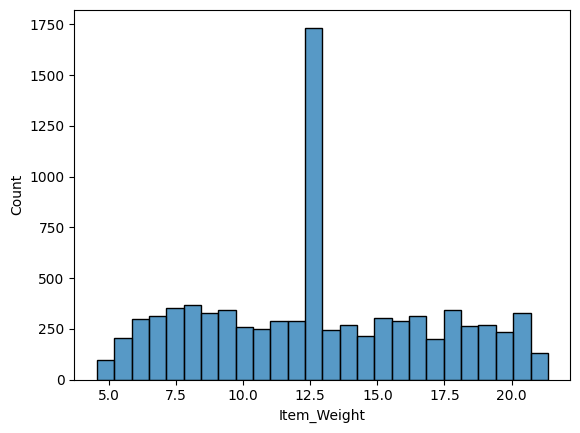

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.histplot(data=df, x='Item_Weight')

<Axes: xlabel='Item_Visibility', ylabel='Count'>

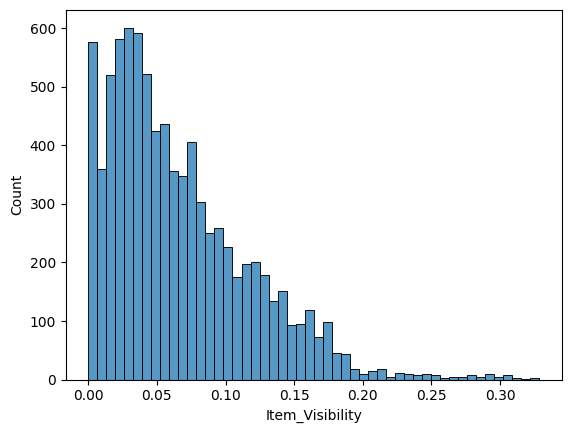

In [15]:
sns.histplot(data=df, x='Item_Visibility')

<Axes: xlabel='Item_Outlet_Sales', ylabel='Count'>

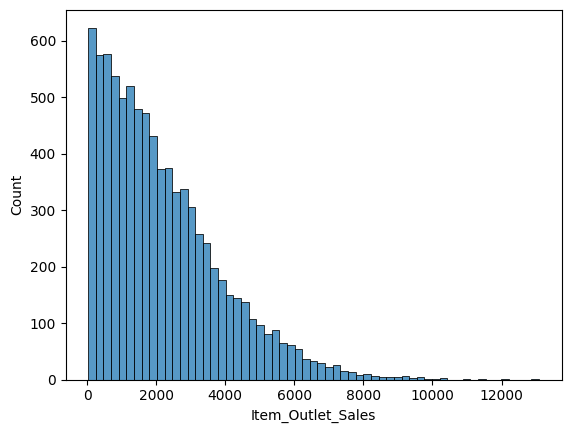

In [16]:
sns.histplot(data=df, x='Item_Outlet_Sales')

<Axes: xlabel='Item_Fat_Content', ylabel='Item_Weight'>

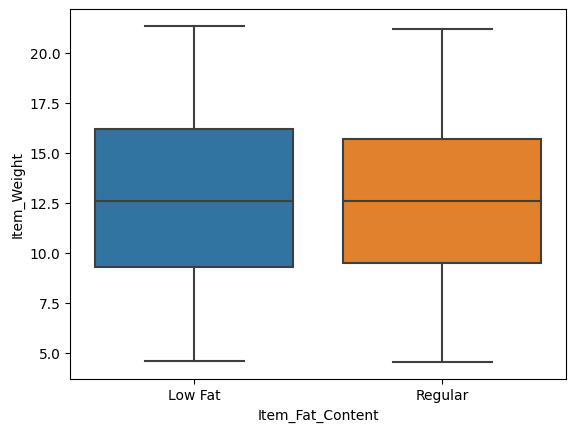

In [17]:
sns.boxplot(data=df, x='Item_Fat_Content', y='Item_Weight')

<Axes: xlabel='Outlet_Size', ylabel='Item_Weight'>

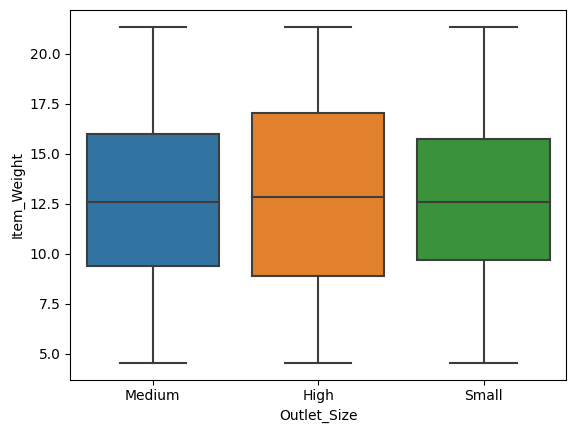

In [18]:
sns.boxplot(data=df, x='Outlet_Size', y='Item_Weight')

<ipython-input-19-9e88c65b767d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  cor = df.corr()


<Axes: >

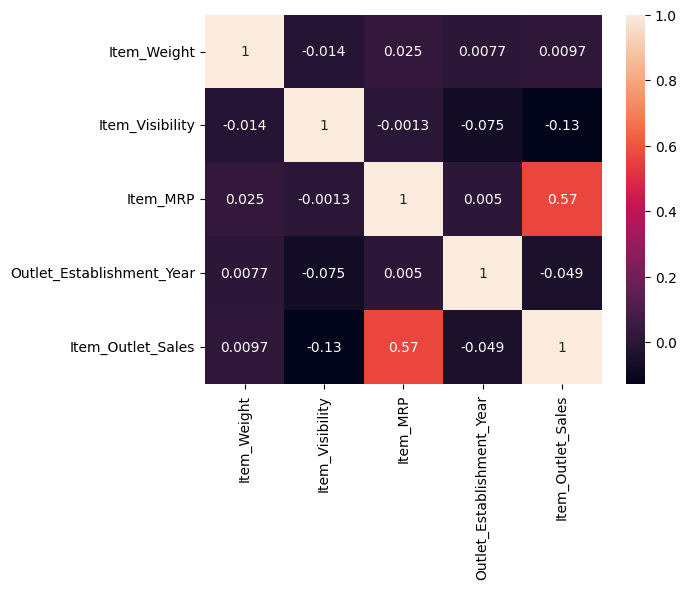

In [19]:
cor = df.corr()
sns.heatmap(cor, annot=True)

#Part 4

In [20]:
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


<ipython-input-21-b646d22dbfb0>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


(array([3.280e+03, 2.448e+03, 1.527e+03, 7.290e+02, 3.590e+02, 1.240e+02,
        3.600e+01, 1.600e+01, 2.000e+00, 2.000e+00]),
 array([   33.29   ,  1338.65748,  2644.02496,  3949.39244,  5254.75992,
         6560.1274 ,  7865.49488,  9170.86236, 10476.22984, 11781.59732,
        13086.9648 ]),
 <BarContainer object of 10 artists>)

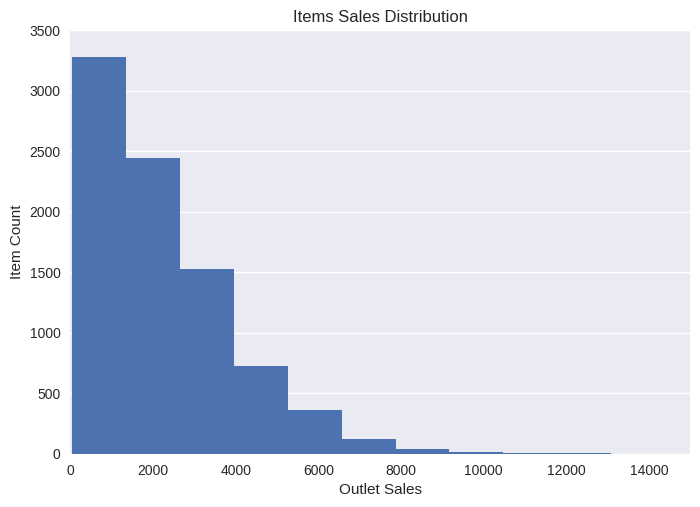

In [21]:
plt.style.use('seaborn')
plt.xlim(left=0,right=15000)
plt.ylim(bottom=0,top=3500)
plt.xlabel('Outlet Sales')
plt.ylabel('Item Count')
plt.grid(axis = 'x')
plt.title('Items Sales Distribution')
plt.hist(data=df, x='Item_Outlet_Sales')

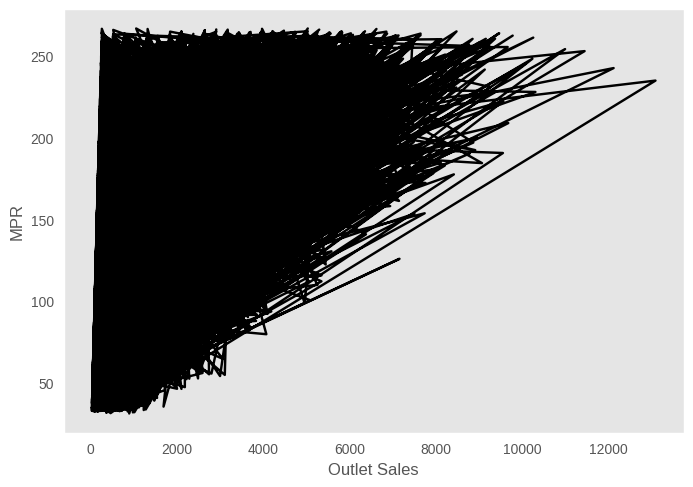

In [22]:
plt.style.use('ggplot')
plt.xlabel('Outlet Sales')
plt.ylabel('MPR')
plt.grid()
plt.plot(df['Item_Outlet_Sales'], df['Item_MRP'], c= 'k')


# PART 5

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [34]:
from sklearn.model_selection import train_test_split
y = df['Item_Outlet_Sales']
X = df.drop(columns = 'Item_Outlet_Sales')
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)


In [35]:
df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64